# Kickstarter Analysis
### Sam B, Ben S, Eliza-Eve L, Vera W & MP

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For Formatting
from matplotlib.ticker import FormatStrFormatter
kick_colors = 'YlGnBu'
list_months = ("Jan","Feb","Mar","Apr","May","Jun",
               "Jul","Aug","Sep","Oct","Nov","Dec")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Our dataset uses the 2018 Kickstarter data from Kaggle
<a href="https://www.kaggle.com/kemical/kickstarter-projects/downloads/ks-projects-201801.csv/7">CLICK HERE TO DOWNLOAD .CSV</a>
<ol>
    <li> After downloading the file please unzip it.
    <li> Following the decompression, rename the file as "kickstarter.csv"
    <li> Make sure the file is in the same directory as your iPython notebook
</ol>

#### Importing the dataset and converting dates to datetime

In [3]:
# I saved the .csv in the same folder as my .IPYNB, 
#  Reading the CSV into iPython
data = pd.read_csv("kickstarter.csv")

In [64]:
# Save the imported csv data as new DataFrame, 
# we can always call this later if we want to start from scratch
df_data = pd.DataFrame(data)

# Start working with a main DataFrame
# Convert date columns to datetime format, have Pandas 'infer' format
df_Kickstarter = df_data
df_Kickstarter["deadline"] = pd.to_datetime(df_data["deadline"], infer_datetime_format=True)
df_Kickstarter["launched"] = pd.to_datetime(df_data["launched"], infer_datetime_format=True)

# Drop na's and run it inplace
df_Kickstarter.dropna(how='any', subset=["name","usd pledged"], inplace=True)

#### 1: The most popular and successful months Kickstarters are launched

In [65]:
# Resample to discover amount pledged per month
df_pledgedMonthly = df_Kickstarter.groupby(by='deadline').sum().resample('1M').sum()
monthlyPledges = df_pledgedMonthly["pledged"]['2011':'12/31/2017']

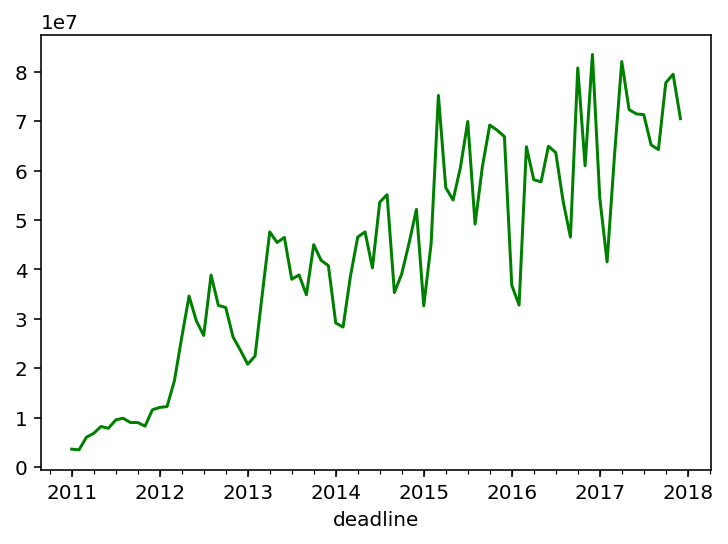

In [66]:
# Simple lineplot, graphing from 2011 end of 2017
monthlyPledges.plot(kind='line', color='green')

/Users/MP/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/MP/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


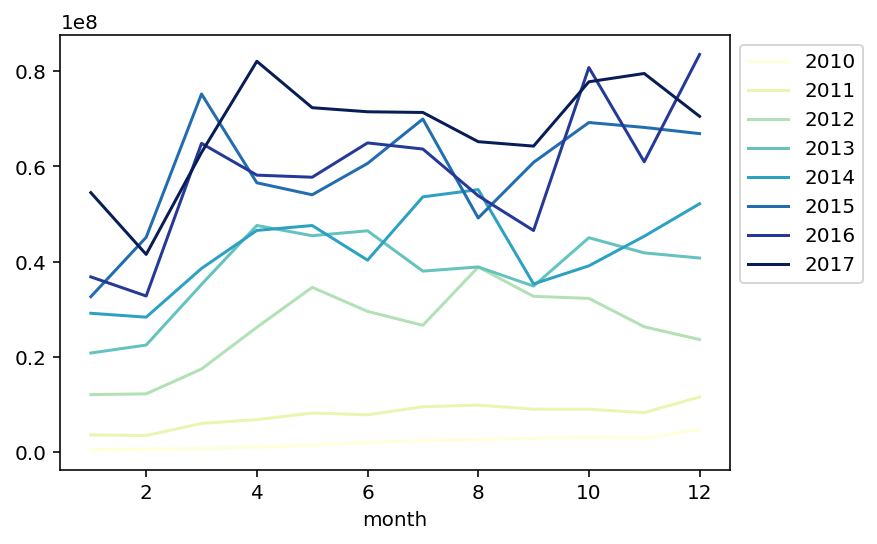

In [144]:
# Create DataFrame and lets look at seaonality
monthlyPledgesYear = df_Kickstarter[["deadline","pledged"]]

# Create columns for year and month
monthlyPledgesYear["year"] = monthlyPledgesYear["deadline"].dt.year
monthlyPledgesYear["month"] = monthlyPledgesYear["deadline"].dt.month

# Create Pivot Table
pivot_monthlyPledge = pd.pivot_table(data=monthlyPledgesYear,
                                    index='month',
                                    columns='year',
                                    values='pledged',
                                    aggfunc='sum')


# Drop 2009 and 2018 because of incomplete data
pivot_monthlyPledge.drop(axis=1,labels=[2009,2018], inplace=True)

# Plot each year
a = pivot_monthlyPledge.plot(kind='line', cmap=kick_colors)
plt.legend(bbox_to_anchor=(1,1))

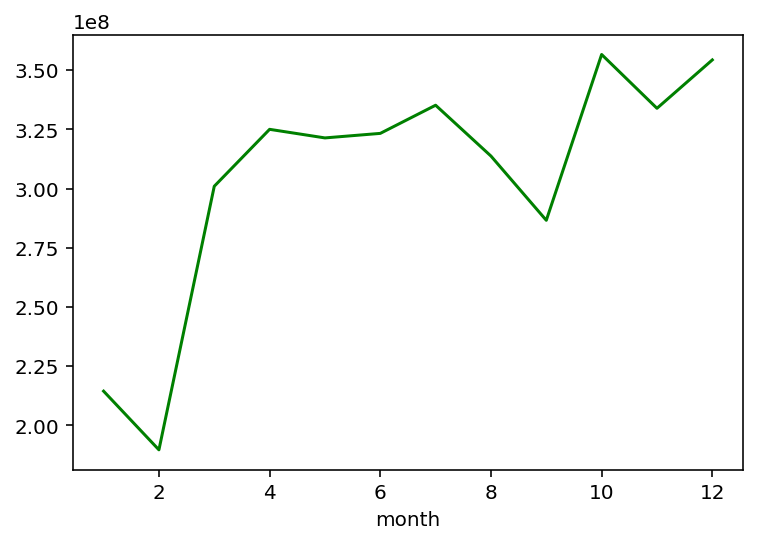

In [149]:
# Plot total by month
sum_monthly = monthlyPledgesYear.groupby(by='month').sum()
a = sum_monthly["pledged"].plot(kind="line", color="green")

<font color='red' size=14>THIS IS WHERE 
    MP STOPPED</font>

#### Analysis of time of fundraising period

In [6]:
# Create new DataFrame for this analysis, don't alter base frame
df_fundTime = df_Kickstarter

# drop NA's, keept it inplace slice
df_fundTime.dropna(how='any', inplace=True)

# Create a column that will handle timedeltas
df_fundTime["tDelta"] = (df_fundTime["deadline"] - df_fundTime["launched"]).dt.days

# Let's only stick to Kickstarters that are less than 2 years for funding
df_fundTime = df_fundTime[df_fundTime['tDelta'] < (365 * 2)]

Text(0.5,1,u'Most common is in the 20-40 day range')

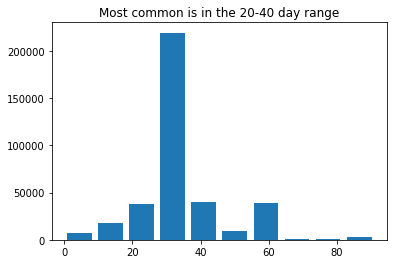

In [7]:
# Historgram
plt.hist(df_fundTime['tDelta'], align='mid', rwidth=0.8)
plt.title("Most common is in the 20-40 day range")

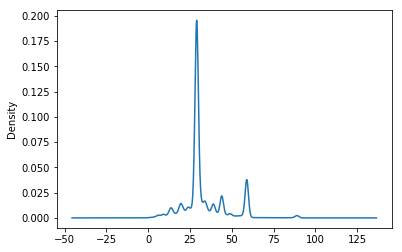

In [75]:
df_fundTime['tDelta'].plot(kind='kde')

In [8]:
# In the 20-40 Day Range, lets look at how may are sucessful vs. the rest
df_inFundRange = df_fundTime[(df_fundTime['tDelta']>=20) & (df_fundTime['tDelta']<=40)]
df_outFundRange = df_fundTime[(df_fundTime['tDelta']<20) | (df_fundTime['tDelta']>40)]

# Group by the state
df_inFundGroup = df_inFundRange.groupby(by="state").count()["ID"]
df_outFundGroup = df_outFundRange.groupby(by="state").count()["ID"]

# Combine
df_fundRangeSuccess = pd.DataFrame(df_inFundGroup)
df_fundRangeSuccess["Outside"] = df_outFundGroup
df_fundRangeSuccess.columns = ["20to40", "Outside"]

Text(-0.3,0.4,u'There seems to be a slightly higher rate \nof success by funding in the 20-40 day range')

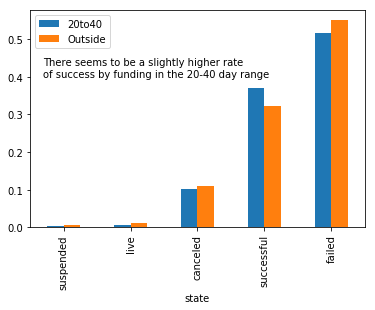

In [9]:
# Normalize the Data
df_SucessNorm = df_fundRangeSuccess
df_SucessNorm["20to40"] = df_fundRangeSuccess["20to40"] / df_fundRangeSuccess["20to40"].sum()
df_SucessNorm["Outside"] = df_fundRangeSuccess["Outside"] / df_fundRangeSuccess["Outside"].sum()
df_SucessNorm.sort_values(by="20to40").plot(kind='bar')
plt.annotate("There seems to be a slightly higher rate \n" \
             "of success by funding in the 20-40 day range",
             xy=(2,0.4),
             xytext=(-0.3,0.4))

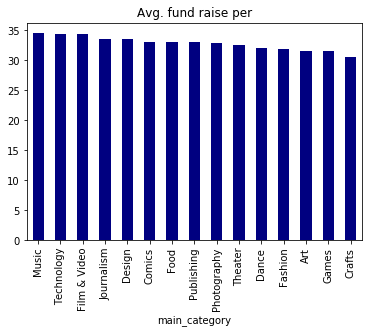

In [40]:
df_fundTime.groupby(by="main_category")["tDelta"].mean().sort_values(ascending=False).plot(kind='bar',
                                                                                           color='navy',
                                                                                           title="Avg. fund raise per")

(0, 55)

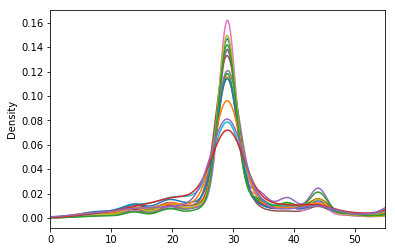

In [89]:
# KDE by categories
cats = df_fundTime['main_category'].unique()
for cat in cats:
    df_fundTime['tDelta'][df_fundTime['main_category'] == cat].plot.kde()
plt.xlim(0,55)

In [114]:
# Make bins and then look at the percent of success in each bin
bins_tDelts = pd.cut(df_fundTime['tDelta'], bins=[0,10,20,30,40,50,1000], labels=["0-10","10-20","20-30",
                                                                                  "30-40","40-50","50+"])
state = df_fundTime.groupby(by=[bins_tDelts, "state"]).count()
state

ID    name  category  main_category  currency  \
tDelta state                                                           
0-10   canceled       515     515       515            515       515   
       failed        3388    3388      3388           3388      3388   
       live            12      12        12             12        12   
       successful    3415    3415      3415           3415      3415   
       suspended       81      81        81             81        81   
10-20  canceled      2208    2208      2208           2208      2208   
       failed       13320   13320     13320          13320     13320   
       live            95      95        95             95        95   
       successful   14949   14949     14949          14949     14949   
       suspended      142     142       142            142       142   
20-30  canceled     21070   21070     21070          21070     21070   
       failed      113392  113392    113392         113392    113392   
       live          1219    1219      1219           1219      1219   
       successful   74435   74435     74435          74435     74435   
       suspended      933     933       933            933       933   
30-40  canceled      5334    5334      5334           5334      5334   
       failed       21743   21743     21743          21743     21743   
       live           402     402       402            402       402   
       successful   20675   20675     20675          20675     20675   
       suspended      187     187       187            187       187   
40-50  canceled      3643    3643      3643           3643      3643   
       failed       16833   16833     16833          16833     16833   
       live           380     380       380            380       380   
       successful   10170   10170     10170          10170     10170   
       suspended      161     161       161            161       161   
50+    canceled      5972    5972      5972           5972      5972   
       failed       28878   28878     28878          28878     28878   
       live           690     690       690            690       690   
       successful   10172   10172     10172          10172     10172   
       suspended      337     337       337            337       337   

                   deadline    goal  launched  pledged  backers  country  \
tDelta state                                                               
0-10   canceled         515     515       515      515      515      515   
       failed          3388    3388      3388     3388     3388     3388   
       live              12      12        12       12       12       12   
       successful      3415    3415      3415     3415     3415     3415   
       suspended         81      81        81       81       81       81   
10-20  canceled        2208    2208      2208     2208     2208     2208   
       failed         13320   13320     13320    13320    13320    13320   
       live              95      95        95       95       95       95   
       successful     14949   14949     14949    14949    14949    14949   
       suspended        142     142       142      142      142      142   
20-30  canceled       21070   21070     21070    21070    21070    21070   
       failed        113392  113392    113392   113392   113392   113392   
       live            1219    1219      1219     1219     1219     1219   
       successful     74435   74435     74435    74435    74435    74435   
       suspended        933     933       933      933      933      933   
30-40  canceled        5334    5334      5334     5334     5334     5334   
       failed         21743   21743     21743    21743    21743    21743   
       live             402     402       402      402      402      402   
       successful     20675   20675     20675    20675    20675    20675   
       suspended        187     187       187      187      187      187   
40-50  canceled        3643    3643      3643 

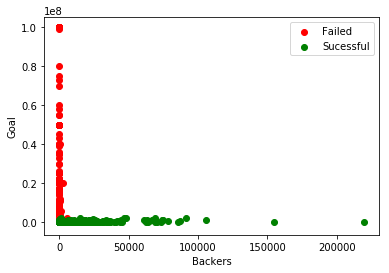

In [99]:
# FOR ELIZA-EVE
df_EE = df_fundTime[(df_fundTime["state"] == "successful") | (df_fundTime["state"] == "failed")]
fail_back = df_EE["backers"][df_EE["state"] == "failed"]
fail_goal = df_EE["goal"][df_EE["state"] == "failed"]
succ_back = df_EE["backers"][df_EE["state"] == "successful"]
succ_goal = df_EE["goal"][df_EE["state"] == "successful"]

plt.scatter(x=fail_back, y=fail_goal, color='red', label="Failed")
plt.scatter(x=succ_back, y=succ_goal, color='green', label="Sucessful")
plt.xlabel("Backers")
plt.ylabel("Goal")
plt.legend(loc='best', )